In [4]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

In [8]:
# Load preprocessed data
sales_df = pd.read_csv("../data/modifiedSales.csv")

# Apply one-hot encoding for categorical columns (for likes of 'Name', 'Platform', 'Genre')
sales_df = pd.get_dummies(sales_df, drop_first=True)

# Separate features and target
X = sales_df.drop(columns=['Global_Sales'])
y = sales_df['Global_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.0093574622602822e-05
R² Score: 0.9999852542681437
Root Mean Squared Error: 0.004482585707223323


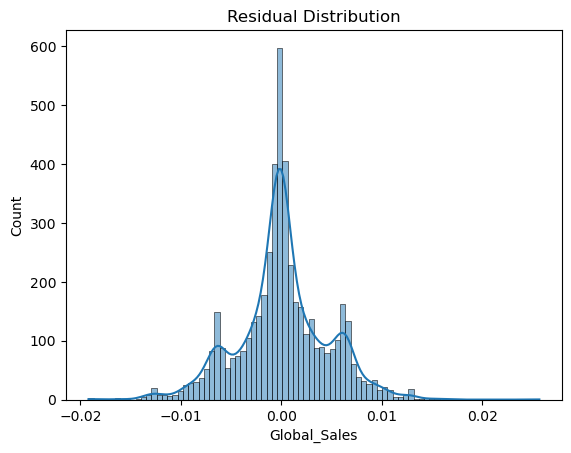

In [10]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


In [12]:
# For regression
metrics_regression = {
    "MSE": mean_squared_error(y_test, y_pred),
    "R²": r2_score(y_test, y_pred),
    "RMSE":  rmse,
}
with open("../results/metrics_regression.json", "w") as f:
    json.dump(metrics_regression, f)